In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,3,...,NaN,A,A,A,A,C,A,A,B,A
4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,0,...,5.0,C,A,A,A,A,D,A,A,A
5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,2,...,NaN,A,A,A,A,A,A,A,A,A


In [22]:
df_train.columns.tolist()

['NU_INSCRICAO',
 'NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO'

In [5]:
print(f'Shape do df de train: {df_train.shape}\nShape do df de test: {df_test.shape}') 

Shape do df de train: (13730, 166)
Shape do df de test: (4576, 47)


In [6]:
df_train['NU_NOTA_MT'].describe()

count    10133.000000
mean       482.497928
std         99.826323
min          0.000000
25%        408.900000
50%        461.200000
75%        537.600000
max        952.000000
Name: NU_NOTA_MT, dtype: float64

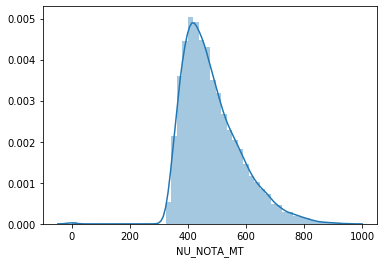

In [7]:
sns.distplot(df_train['NU_NOTA_MT'])

In [8]:
#skewness and kurtosis
print(f"Skewness: {df_train['NU_NOTA_MT'].skew()}")
print(f"Kurtosis: {df_train['NU_NOTA_MT'].kurt()}")

Skewness: 0.9206896733932955
Kurtosis: 1.4225025820577502


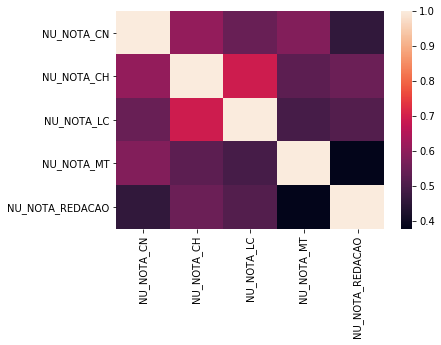

In [9]:
# Compute the correlation matrix
corr = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].corr()

sns.heatmap(corr)

In [10]:
df_train['NU_NOTA_MT'].isna().sum()

3597

In [11]:
 df_train = df_train.dropna( how='all', subset=['NU_NOTA_MT'] )
 df_train['NU_NOTA_MT'].isna().sum()

0

In [12]:
features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

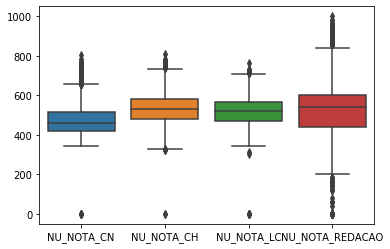

In [13]:
sns.boxplot(data=df_train[features])

In [14]:
df_train[features].isna().sum()

NU_NOTA_CN         36
NU_NOTA_CH         36
NU_NOTA_LC          0
NU_NOTA_REDACAO     0
dtype: int64

In [15]:
df_train[features] = df_train[features].fillna(-1)
df_train[features].isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [16]:
x = df_train[features]
y = df_train['NU_NOTA_MT']

In [17]:
#modeling
forest = RandomForestRegressor(max_depth=12, min_samples_leaf=5)
forest_fit = forest.fit(x, y)

In [18]:
#predicting
df_test[features] = df_test[features].fillna(-1)
predict = forest_fit.predict( df_test[features] )

In [19]:
answer = df_test[['NU_INSCRICAO']].copy()
answer['NU_NOTA_MT'] = predict

In [20]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,427.743441
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,448.683530
2,b38a03232f43b11c9d0788abaf060f7366053b6d,598.695131
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,98.372418
4,715494628a50142ce8cb17191cfe6d0f3cae0934,533.631902


In [21]:
answer.to_csv('answer.csv', index=False)